In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dataset
dataset = pd.read_excel("dataset/Real estate valuation data set.xlsx", engine='openpyxl')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [382]:
data = np.array(dataset.iloc[:, :].T)

# Separando X e y
X_raw = data[1:-1].T
X = np.column_stack((X_raw, np.ones(X_raw.shape[0]))) # Adicionar uma coluna de 1s para considerar o termo de bias (intercept)
y = data[-1].reshape(-1, 1) # Vetorizando

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

X.shape, y.shape

((414, 7), (414, 1))

In [383]:
# Funções de ativação para o neurônio
def activate_functions(type, matrix):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-matrix))
    elif type == 'softmax':
        exp_matrix = np.exp(matrix - np.max(matrix, axis=1, keepdims=True))
        return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)   
    elif type == 'tanh':
        return np.tanh(matrix)

# Função de treino do MLP
def mlp_train(X, y, n_neurons_hlayer, epochs, l_rate, criteria):

    # print(X, y)
    n_features = X.shape[1]
 
    w_input = np.random.randn(n_features, n_neurons_hlayer) * np.sqrt(2/n_features) 
    w_output = np.random.randn(n_neurons_hlayer, 1) * np.sqrt(2/n_neurons_hlayer) 

    bias_input = np.random.randn(n_neurons_hlayer, 1) * 0.5
    bias_output = np.random.randn(1, 1) * 0.5
    
    wait = 0
    for epoch in range(epochs):

        indices = np.arange(414)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        # Forward
        Zin = np.dot(X , w_input) + bias_input.T
        result_in = activate_functions('sigmoid', Zin)

        Zout = (result_in @ w_output) + bias_output.T
        result_out = Zout

        # Backpropagation
        error_out = result_out - y
        grad_out = error_out / len(X)

        error_in = grad_out @ w_output.T
        grad_in = error_in * result_in * (1 - result_in)

        # Ajustar os pesos e os viéses
        w_input -= l_rate * (np.dot(X.T, grad_in)/ len(X))
        w_output -= l_rate * (np.dot(result_in.T, grad_out)/ len(X))

        bias_input -= l_rate * np.sum(grad_in/ len(X), axis=0, keepdims=True).T
        bias_output -= l_rate * np.sum(grad_out/ len(X), axis=0, keepdims=True).T

        if epoch == 0:
            loss = np.mean((y - result_out)**2)
            print('Initial Epoch: {}, loss: {}'.format(epoch, loss))
            best_loss = loss

        if epoch % 1000==0: l_rate = l_rate / 2.1
        if epoch != 0 and epoch % 100 == 0:
            loss = np.mean((y - result_out)**2)
            print('Epoch: {}, loss: {}'.format(epoch, loss))
             
            if loss < best_loss:
                best_loss = loss
                wait = 0
            else: wait += 1

            if wait >= criteria:
                print('Final Epoch (loss stopped): {}, loss: {}'.format(epoch, loss))
                return w_input, w_output, bias_input, bias_output

    loss = np.mean((y - result_out)**2)
    print('Last Epoch: {}, loss: {}'.format(epoch+1, loss))
                                      
    return w_input, w_output, bias_input, bias_output

w_input, w_output, bias_input, bias_output = mlp_train(X, y, n_neurons_hlayer=414, epochs=10000, l_rate=0.039, criteria=10)

Initial Epoch: 0, loss: 0.9538226287389072
Epoch: 100, loss: 0.9000406073940449
Epoch: 200, loss: 0.8713847888646744
Epoch: 300, loss: 0.8510432083903166
Epoch: 400, loss: 0.8338742825037722
Epoch: 500, loss: 0.8182064222640628
Epoch: 600, loss: 0.8034816275129926
Epoch: 700, loss: 0.7894999397183329
Epoch: 800, loss: 0.7761771555109092
Epoch: 900, loss: 0.7634671017199454
Epoch: 1000, loss: 0.751336673478513
Epoch: 1100, loss: 0.745695377469823
Epoch: 1200, loss: 0.7402383224448317
Epoch: 1300, loss: 0.7349007159173132
Epoch: 1400, loss: 0.7296799104783939
Epoch: 1500, loss: 0.7245733266640312
Epoch: 1600, loss: 0.7195784473914772
Epoch: 1700, loss: 0.7146928142169885
Epoch: 1800, loss: 0.7099140246651118
Epoch: 1900, loss: 0.7052397301928012
Epoch: 2000, loss: 0.7006676345338321
Epoch: 2100, loss: 0.698502338083351
Epoch: 2200, loss: 0.6963831482922724
Epoch: 2300, loss: 0.6942861446416048
Epoch: 2400, loss: 0.6922110937057332
Epoch: 2500, loss: 0.6901577645212554
Epoch: 2600, loss: 

In [384]:
# Função de predição do MLP
def mlp_predict(X, w_in, w_out, bias_in, bias_out):
    # Forward
    Zin = (X @ w_in) + bias_in.T
    result_in = activate_functions('sigmoid', Zin)

    Zout = (result_in @ w_out) + bias_out.T
    result_out = Zout
    
    return result_out

# Realizar a predição no conjunto de teste
y_pred = mlp_predict(X, w_input, w_output, bias_input, bias_output)

print(y_pred.shape)
print(y.shape)

(414, 1)
(414, 1)


In [385]:
from sklearn.metrics import r2_score

# Avaliar o desempenho do regressor
r2 = r2_score(y, y_pred)

print("R²: {}".format(r2))

R²: 0.3365202680721354


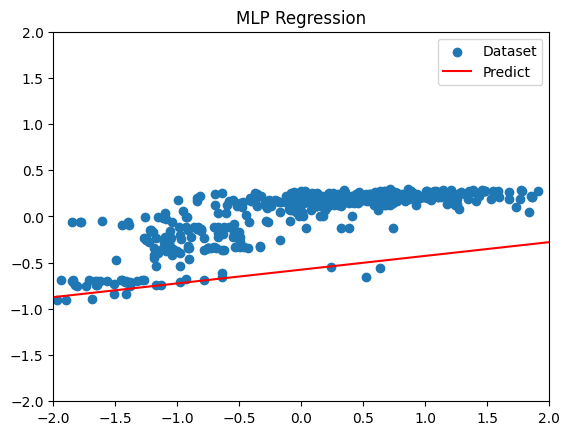

In [388]:
plt.scatter(y, y_pred, label='Dataset')
plt.plot([np.min(y), np.max(y)], [np.min(y_pred), np.max(y_pred)], color='red', label='Predict')
plt.title('MLP Regression')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()